# Students Mental Health Analysis

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [42]:
df = pd.read_csv('Student Mental health.csv')
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

# Data Cleaning
1. Renaming column head.
2. Handling Missing data
3. Handling Duplicates

In [44]:
df.nunique()

Timestamp                                       92
Choose your gender                               2
Age                                              7
What is your course?                            49
Your current year of Study                       7
What is your CGPA?                               6
Marital status                                   2
Do you have Depression?                          2
Do you have Anxiety?                             2
Do you have Panic attack?                        2
Did you seek any specialist for a treatment?     2
dtype: int64

In [45]:
df['What is your course?'].unique()

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

As we can see 'what is your course' column has many same courses in different way.
eg, Engineering -> Engine, Islamic education -> Islamic Education etc.
So we need to change these.

In [46]:
df['Your current year of Study'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In above column also there are some errors like

year 2 and Year 2

year 3 and Year 3 are same

In [47]:
df[df['Age'].isnull()]

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
43,8/7/2020 15:07,Male,NaN,BIT,year 1,0 - 1.99,No,No,No,No,No


# From above analysis we can deduce that:
1. Rename all the column heading (shorten them).
2. Timestamp column is not required in our analysis, so we will drop this column.
3. Age column has one missing value, we will either fill it with mean of age column or remove that particular row.
4. Course Name has formatting issues, this has to be handcorrectedled. ( Laws is same as law)
5. Current year of study has formatting issues, this has to be corrected. ( year 1 is same as Year 1)
6. Few rows in CGPA column has space in end, has to be corrected.

In [48]:
df2 = df.copy()
df2.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [49]:
df2.drop(columns = ['Timestamp'], axis=1, inplace=True)
df2.head()

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [50]:
df2.shape

(101, 10)

In [51]:
# Renaming column headings

df2.rename(columns={
                            'Choose your gender' : 'gender',
                            'Age' : 'age',
                            'What is your course?' : 'course',
                            'Your current year of Study' : 'current_year',
                            'What is your CGPA?' : 'cgpa',
                            'Marital status' : 'marital_status',
                            'Do you have Depression?' : 'has_depression',
                            'Do you have Anxiety?' : 'has_anxiety',
                            'Do you have Panic attack?'  : 'has_panic_attack',
                            'Did you seek any specialist for a treatment?' : 'visited_specialist'}, inplace=True)

df2.head()

,gender,age,course,current_year,cgpa,marital_status,has_depression,has_anxiety,has_panic_attack,visited_specialist
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [52]:
# dropping row where value of age is null
df2.dropna(inplace=True)
df2.shape

(100, 10)

In [53]:
# Correcting format of course names

df2.replace({
                        'Engine':'Engineering',
                        'engin' : 'Engineering',
                        'Islamic education' : 'Islamic Education',
                        'BIT': 'IT',
                        'Laws' : 'Law',
                        'Pendidikan islam': 'Pendidikan Islam',
                        'Pendidikan Islam ': 'Pendidikan Islam',
                        'KIRKHS':'Irkhs',
                        'Kirkhs':'Irkhs',
                        'Marine science' : 'Marine Science',
                        'koe': 'Koe',
                        'KOE': 'Koe',
                        'Biomedical science' : 'Biomedical Science',
                        'Benl':'BENL',
                        'Econs' : 'Economics',
                        'Human Sciences ':'Human Sciences',
                        'psychology' : 'Psychology',
                        'Fiqh fatwa ' : 'Fiqh Fatwa',
                        'DIPLOMA TESL': 'Diploma TESL',
                        'Fiqh' : 'Fiqh Fatwa',
                        'Accounting ':'Accounting',
                        'Communication ':'Communication',
                        'Nursing ':'Nursing'}, inplace=True)
df2.head()

,gender,age,course,current_year,cgpa,marital_status,has_depression,has_anxiety,has_panic_attack,visited_specialist
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic Education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,IT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Law,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [54]:
df2['course'].unique()

array(['Engineering', 'Islamic Education', 'IT', 'Law', 'Mathemathics',
       'Pendidikan Islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting', 'ENM', 'Marine Science',
       'Koe', 'Banking Studies', 'Business Administration', 'Usuluddin ',
       'TAASL', 'ALA', 'Biomedical Science', 'BENL', 'CTS', 'Economics',
       'MHSC', 'Malcom', 'Kop', 'Human Sciences', 'Biotechnology',
       'Communication', 'Diploma Nursing', 'Radiography', 'Fiqh Fatwa',
       'Diploma TESL', 'Nursing'], dtype=object)

In [55]:
df2['course'].nunique()

35

In [56]:
# Correcting format of current year

df2.replace({'year 1' : 'Year 1',
                    'year 2' : 'Year 2',
                    'year 3' : 'Year 3',
                    'year 4' : 'Year 4'}, inplace=True)

df2['current_year'].unique()

array(['Year 1', 'Year 2', 'Year 3', 'Year 4'], dtype=object)

In [57]:
# Removing trailing white spaces from cgpa column

df2['cgpa'] = df2['cgpa'].apply(lambda x:x.strip())

df2['cgpa'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

# EDA

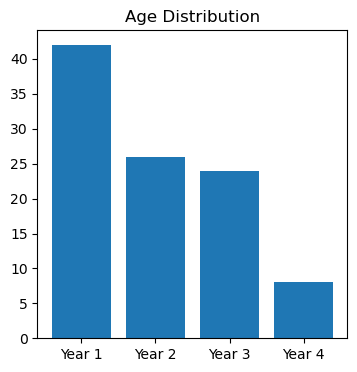

In [58]:
plt.figure(figsize=(4,4))
plt.title('Age Distribution')
plt.bar(x=df2['current_year'].value_counts().index.tolist(), height=df2['current_year'].value_counts().values.tolist())
plt.show()

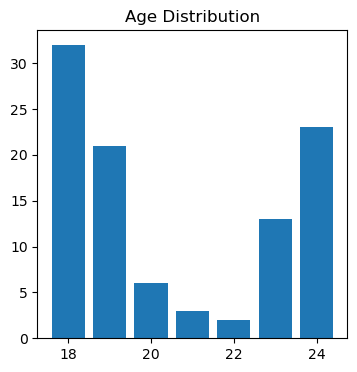

In [59]:
plt.figure(figsize=(4,4))
plt.title('Age Distribution')
plt.bar(x=df2['age'].value_counts().index, height=df2['age'].value_counts().values)
plt.show()

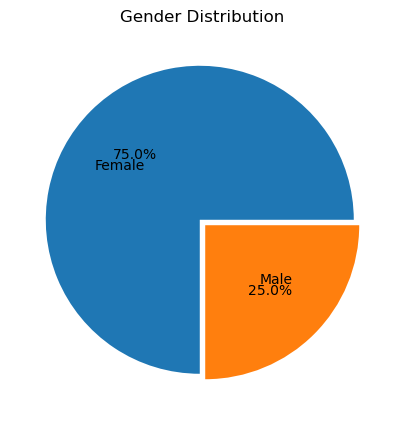

In [60]:
plt.figure(figsize=(14, 5))
plt.title('Gender Distribution')
plt.pie(df2['gender'].value_counts(),labels=df2['gender'].value_counts().index, autopct='%1.1f%%', explode=(0.025,0.025), labeldistance=0.5)
plt.show()

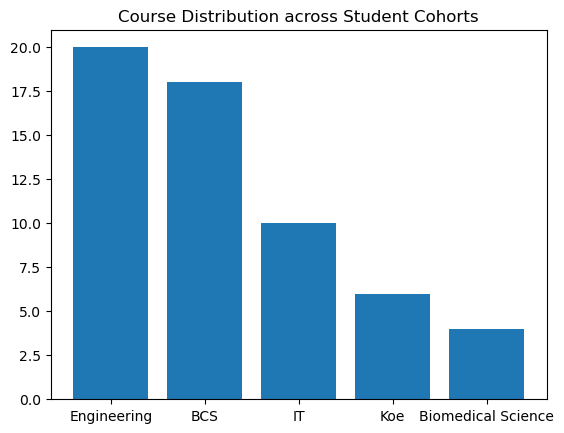

In [61]:
x = df2.groupby('course')['gender'].count().sort_values(ascending=False).head().index.to_list()
y = df2.groupby('course')['gender'].count().sort_values(ascending=False).head().values.tolist()
plt.title("Course Distribution across Student Cohorts")
plt.bar(x, y)
plt.show()

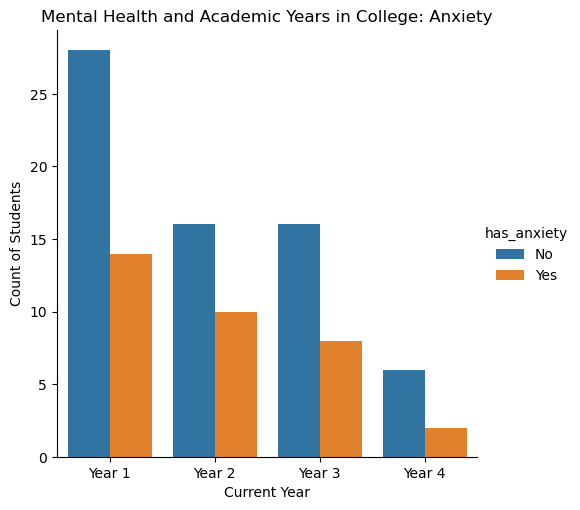

In [63]:
sns.catplot(data=df2, x="current_year", hue='has_anxiety', kind="count")\
    .set(title="Mental Health and Academic Years in College: Anxiety", \
        xlabel='Current Year',\
        ylabel='Count of Students')

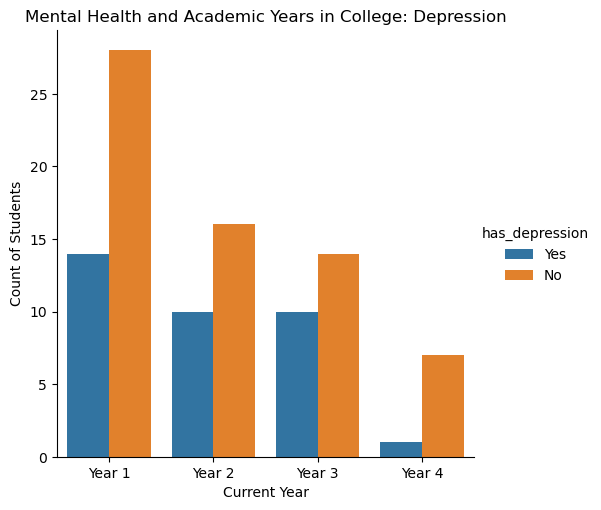

In [64]:
sns.catplot(data=df2, x="current_year", hue='has_depression', kind="count")\
    .set(title="Mental Health and Academic Years in College: Depression", \
        xlabel='Current Year',\
        ylabel='Count of Students')

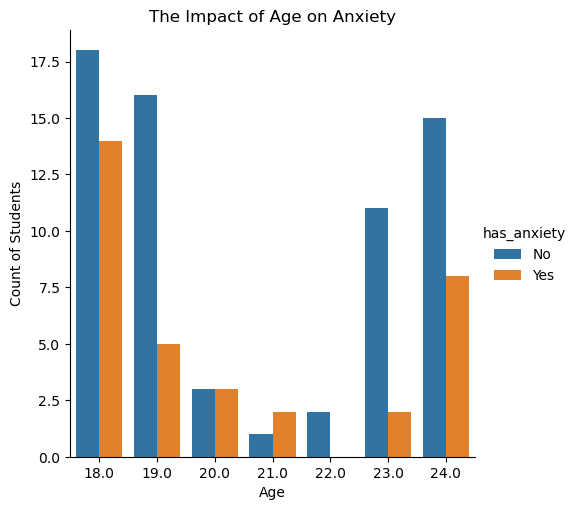

In [66]:
sns.catplot(data=df2, x="age", hue='has_anxiety', kind="count")\
    .set(title="The Impact of Age on Anxiety", \
        xlabel='Age',\
        ylabel='Count of Students')

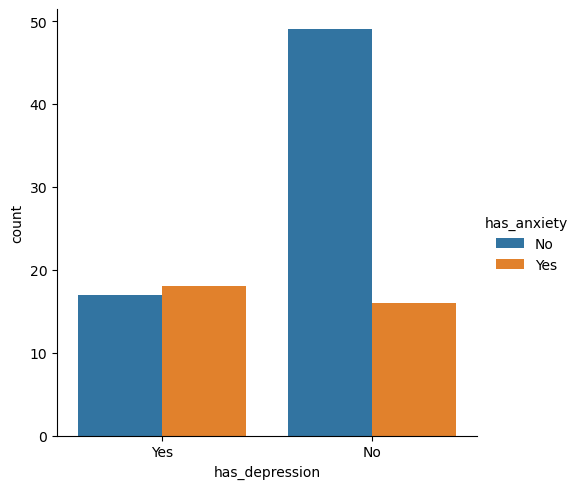

In [68]:
sns.catplot(data=df2, x="has_depression", hue='has_anxiety', kind="count")

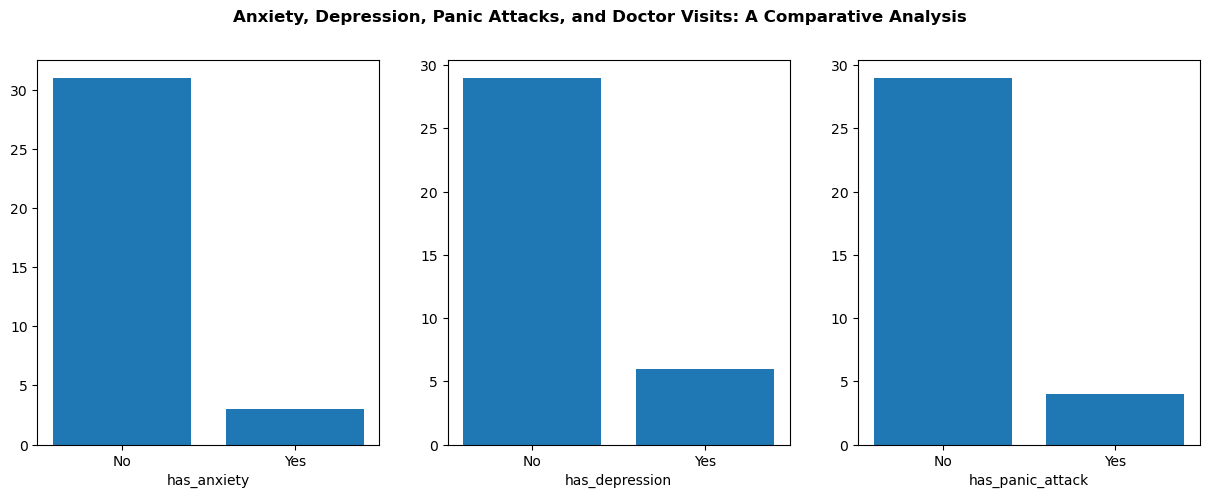

In [71]:
fig, axis = plt.subplots(1,3, figsize=(15, 5))
fig.suptitle("Anxiety, Depression, Panic Attacks, and Doctor Visits: A Comparative Analysis",fontweight="bold", size=12)

column_list = ['has_anxiety', 'has_depression', 'has_panic_attack']

for i in range(len(column_list)):
    x = df2[df2[column_list[i]] == 'Yes']['visited_specialist'].value_counts().index.tolist()
    y = df2[df2[column_list[i]] == 'Yes']['visited_specialist'].value_counts().values.tolist()
    axis[i].bar(x, y)
    axis[i].set_xlabel(column_list[i])